In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet

C:\Users\shisk\anaconda3\envs\sklearn\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('../Data/Miles_Traveled.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [5]:
# rename column to be usable with prophet
df.columns = ['ds', 'y']

In [6]:
df['ds'] = pd.to_datetime(df['ds'])

In [7]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


<Axes: >

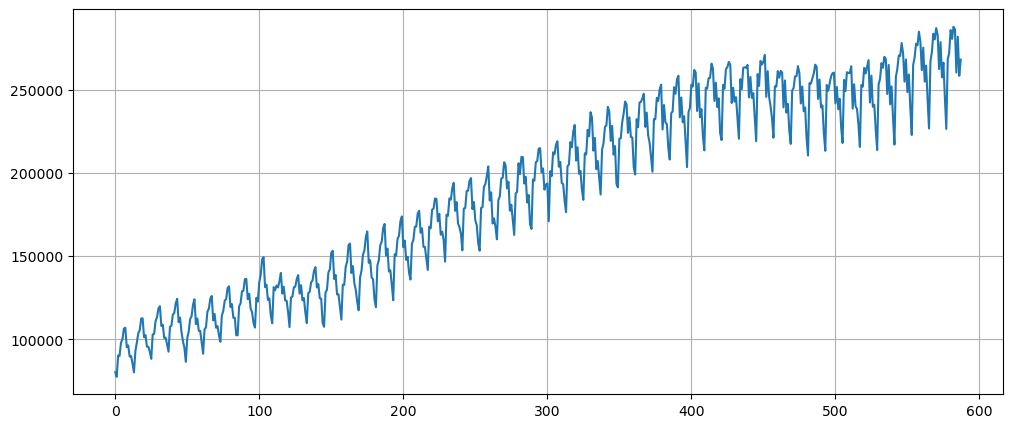

In [8]:
df['y'].plot(figsize = (12, 5), grid = True)

In [9]:
len(df)

588

### Train Test Split

In [13]:
# the last 12 months data will be used for testing
train = df.iloc[:-12]
test = df.iloc[-12:]

In [14]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods = 12, freq = 'MS')

10:22:53 - cmdstanpy - INFO - Chain [1] start processing
10:22:53 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
forecast = m.predict(future)

### Evaluation

In [16]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,94489.872120,70094.947914,81786.469492,94489.872120,94489.872120,-18592.347502,-18592.347502,-18592.347502,-18592.347502,-18592.347502,-18592.347502,0.0,0.0,0.0,75897.524618
1,1970-02-01,94794.021394,62373.562686,73827.478698,94794.021394,94794.021394,-27103.444281,-27103.444281,-27103.444281,-27103.444281,-27103.444281,-27103.444281,0.0,0.0,0.0,67690.577113
2,1970-03-01,95068.736866,89423.783364,100777.886566,95068.736866,95068.736866,-27.883406,-27.883406,-27.883406,-27.883406,-27.883406,-27.883406,0.0,0.0,0.0,95040.853460
3,1970-04-01,95372.886140,89811.535204,100854.718692,95372.886140,95372.886140,31.989668,31.989668,31.989668,31.989668,31.989668,31.989668,0.0,0.0,0.0,95404.875808
4,1970-05-01,95667.224147,99773.168550,111159.371240,95667.224147,95667.224147,9618.996355,9618.996355,9618.996355,9618.996355,9618.996355,9618.996355,0.0,0.0,0.0,105286.220501


<Axes: xlabel='ds'>

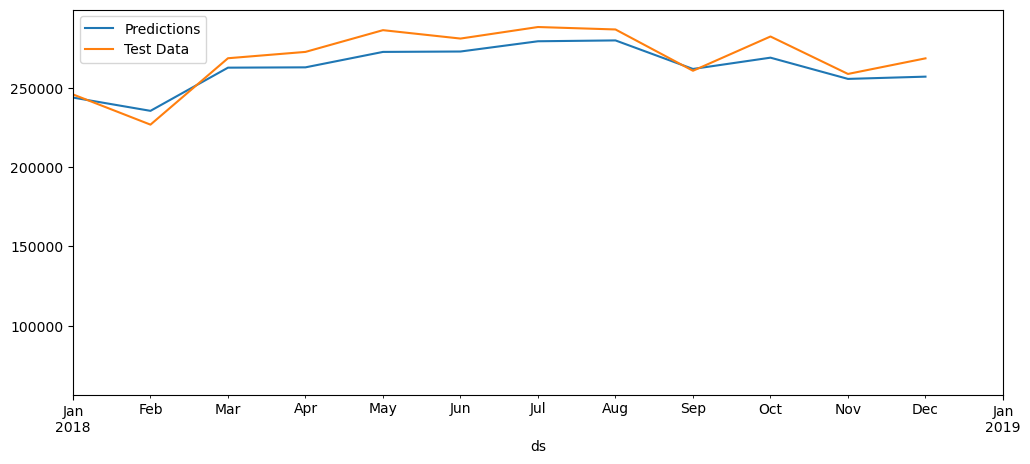

In [19]:
ax = forecast.plot(x = 'ds', y = 'yhat', label = 'Predictions', legend=True, figsize = (12, 5))
test.plot(x = 'ds', y = 'y', label = 'Test Data', legend=True, ax = ax, xlim = ('2018-01-01','2019-01-01'))

In [20]:
from statsmodels.tools.eval_measures import rmse

In [21]:
predictions = forecast.iloc[-12:]['yhat']

In [22]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [25]:
err = rmse(predictions, test['y'])
err

8723.11458566728

In [26]:
test_mean = test['y'].mean()
test_mean

268739.6666666667

In [27]:
err/test_mean

0.032459348833259745

### Evaluation using Prophet Diagnostics

In [28]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [30]:
# initial training period
initial = 5 * 365         # 5 years(daily)
initial = str(initial) + ' days'

# period length for cross validation
period = 5 * 365
period = str(period) + ' days'

# forecasting horizon, this is the validation data
horizon = 365
horizon = str(horizon) + ' days'

In [31]:
df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

  0%|                                                                                                           | 0/9 [00:00<?, ?it/s]10:34:14 - cmdstanpy - INFO - Chain [1] start processing
10:34:15 - cmdstanpy - INFO - Chain [1] done processing
 11%|███████████                                                                                        | 1/9 [00:01<00:10,  1.31s/it]10:34:15 - cmdstanpy - INFO - Chain [1] start processing
10:34:15 - cmdstanpy - INFO - Chain [1] done processing
 22%|██████████████████████                                                                             | 2/9 [00:02<00:06,  1.02it/s]10:34:16 - cmdstanpy - INFO - Chain [1] start processing
10:34:16 - cmdstanpy - INFO - Chain [1] done processing
 33%|█████████████████████████████████                                                                  | 3/9 [00:02<00:04,  1.41it/s]10:34:16 - cmdstanpy - INFO - Chain [1] start processing
10:34:16 - cmdstanpy - INFO - Chain [1] done processing
 44%|███████

In [32]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.056712,107033.128483,109726.616157,102445.0,1976-12-11
1,1977-02-01,102996.080620,101721.344952,104474.273520,102416.0,1976-12-11
2,1977-03-01,118973.287825,117469.764861,120369.198079,119960.0,1976-12-11
3,1977-04-01,120612.896843,119113.600094,122092.488682,121513.0,1976-12-11
4,1977-05-01,127882.997333,126386.128363,129388.121132,128884.0,1976-12-11


In [33]:
len(df_cv)

108

In [34]:
# cross validation results
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,52 days,2.392620e+07,4891.441802,4495.785193,0.027551,0.023503,0.027137,0.4
1,53 days,2.139317e+07,4625.274740,4225.237984,0.024757,0.023503,0.024464,0.4
2,54 days,1.799877e+07,4242.495209,3700.027719,0.019866,0.022254,0.019710,0.5
3,55 days,2.263701e+07,4757.836906,4206.850433,0.022844,0.023503,0.022603,0.4
4,57 days,2.060908e+07,4539.722156,3958.035585,0.021211,0.022254,0.021007,0.5
...,...,...,...,...,...,...,...,...
94,360 days,1.815642e+07,4261.035516,3740.132970,0.019540,0.019440,0.019550,0.5
95,361 days,1.727838e+07,4156.726773,3460.297498,0.018146,0.018944,0.018166,0.5
96,362 days,3.151940e+07,5614.213845,4379.294087,0.021916,0.024308,0.021817,0.4
97,364 days,2.970923e+07,5450.617688,4208.599878,0.021275,0.021428,0.021190,0.5


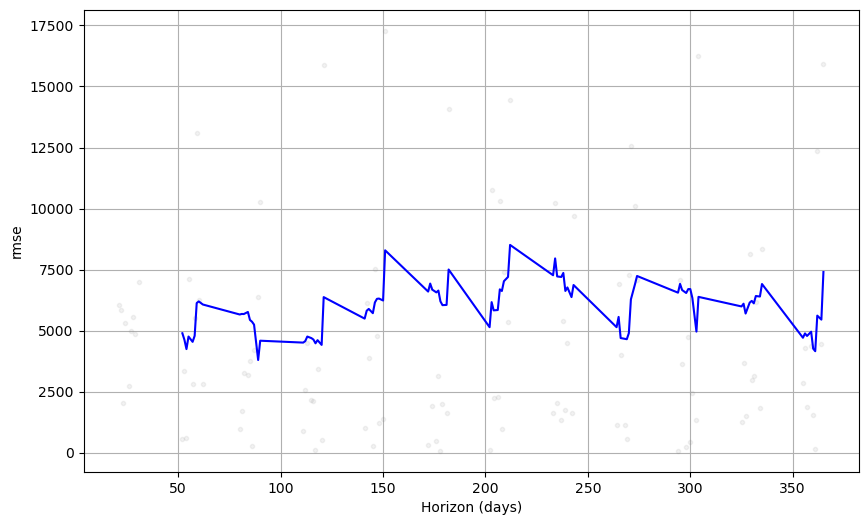

In [36]:
plot_cross_validation_metric(df_cv, metric = 'rmse');